In [14]:
#5 перших рядків датасету
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
print(df.head())

  Country/Territory IMF[1][13]            World Bank[14]             \
  Country/Territory   Forecast       Year       Estimate       Year   
0             World  109529216       2024      105435540       2023   
1     United States   28781083       2024       27360935       2023   
2             China   18532633  [n 1]2024       17794782  [n 3]2023   
3           Germany    4591100       2024        4456081       2023   
4             Japan    4110452       2024        4212945       2023   

  United Nations[15]             
            Estimate       Year  
0          100834796       2022  
1           25744100       2022  
2           17963170  [n 1]2022  
3            4076923       2022  
4            4232173       2022  


In [16]:
#2. Визначити розмір датасета.
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
print("\nРозмір датасету:", df.shape)


Розмір датасету: (210, 7)


In [18]:
#3. Визначити оптимальну кількість стовпців.
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
optimal = df.columns
print("Оптимальна кількість стовпців:", len(optimal))


Оптимальна кількість стовпців: 7


In [67]:
#4. Змінити назви всіх стовпців на більш зручні на власний розсуд, 
# наприклад Country MVF_2024 WorldBank_2023 OON_2022
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"], ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
print(df.columns)

MultiIndex([(       'Country',  'Country'),
            (      'IMF_2024', 'Forecast'),
            (      'IMF_2024',     'Year'),
            ('WorldBank_2023', 'Forecast'),
            ('WorldBank_2023',     'Year'),
            (       'UN_2022', 'Forecast'),
            (       'UN_2022',     'Year')],
           )


In [68]:
#5. Визначити тип даних.
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"], ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
print("\nТип даних::")
print(df.dtypes)



Тип даних::
Country         Country     object
IMF_2024        Forecast    object
                Year        object
WorldBank_2023  Forecast    object
                Year        object
UN_2022         Forecast    object
                Year        object
dtype: object


In [70]:
#6. Замініть у таблиці значення "—" на значення NaN. 
# Перевірити наявність пропущених значень. При наявності, замінити пропущені
# значення на середнє значення.
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
missed_values = df.isnull().sum()
print("Пропущені значення ", missed_values, sep='\n')

Пропущені значення 
Country         Country      0
IMF_2024        Forecast    15
                Year        15
WorldBank_2023  Forecast     8
                Year         8
UN_2022         Forecast     1
                Year         1
dtype: int64


In [71]:
#7. Ще раз перевірити наявність пропущених значень.
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
missed_values = df.isnull().sum()
print("Пропущені значення ", missed_values, sep='\n')

Пропущені значення 
Country         Country      0
IMF_2024        Forecast    15
                Year        15
WorldBank_2023  Forecast     8
                Year         8
UN_2022         Forecast     1
                Year         1
dtype: int64


In [75]:
#8. Перевірити наявність дублікатів. При наявності видалити дублікати.
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

print("Загальна кількість рядків:", df.shape[0])
df.drop_duplicates(inplace=True)
print(f"\nКількість рядків після видалення дублікатів:: {df.shape[0]}")


Загальна кількість рядків: 210

Кількість рядків після видалення дублікатів:: 210


In [77]:
#9. Вивести описову статистику датасету describe()
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)

print("Описова статистика датасету:")
print(df.describe())


Описова статистика датасету:
       Country   IMF_2024       WorldBank_2023          UN_2022      
       Country   Forecast  Year       Forecast  Year   Forecast  Year
count      210        195   195            202   202        209   209
unique     210        195    12            202     9        209     9
top      World  109529216  2024      105435540  2023  100834796  2022
freq         1          1   182              1   180          1   201


In [154]:
#10.Визначте відхилення (різницю) між показниками MVF_2024 та
#WorldBank_2023 для кожної країни. У яких країнах ці показники
#найбільше відрізняються (дати відповідь)
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.str.replace(r'\[n \d+\]', '', regex=True)) #прибрано артефакти у вигляді [n *]
print(df.head())
#невдала спроба стандартного знаходження різниці, дані перетворено до цілочисельного типу
df[('IMF_2024', 'Forecast')] = pd.to_numeric(df[('IMF_2024', 'Forecast')], errors='coerce')
df[('WorldBank_2023', 'Forecast')] = pd.to_numeric(df[('WorldBank_2023', 'Forecast')], errors='coerce')
df[('Diff', 'IMF_WB')] = df[('IMF_2024', 'Forecast')] - df[('WorldBank_2023', 'Forecast')]
print("\nВідхилення значень  між IMF_2024 та WorldBank_2023:")
print(df["Diff", "IMF_WB"])
df[('Diff', 'IMF_WB')] = pd.to_numeric(df[('Diff', 'IMF_WB')], errors='coerce')
largest_diff = df[[('Country', 'Country'), ('Diff', 'IMF_WB')]]
print("\nКраїни із найбільшим відхиленням:")
print(largest_diff)


         Country   IMF_2024       WorldBank_2023          UN_2022      
         Country   Forecast  Year       Forecast  Year   Forecast  Year
0          World  109529216  2024      105435540  2023  100834796  2022
1  United States   28781083  2024       27360935  2023   25744100  2022
2          China   18532633  2024       17794782  2023   17963170  2022
3        Germany    4591100  2024        4456081  2023    4076923  2022
4          Japan    4110452  2024        4212945  2023    4232173  2022

 Відхилення значень  між IMF_2024 та WorldBank_2023:
0      4093676.0
1      1420148.0
2       737851.0
3       135019.0
4      -102493.0
         ...    
205         32.0
206         45.0
207         21.0
208          7.0
209          4.0
Name: (Diff, IMF_WB), Length: 210, dtype: float64

Країни із найбільшим відхиленням:
              Country       Diff
              Country     IMF_WB
0               World  4093676.0
1       United States  1420148.0
2               China   737851.0
3    

In [159]:
#11.Обчисліть кореляцію між показниками MVF_2024, WorldBank_2023 та
#OON_2022. Які пари змінних мають найвищу кореляцію?
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.str.replace(r'\[n \d+\]', '', regex=True)) #прибрано артефакти у вигляді [n *]
print(df.head())
df[('IMF_2024', 'Forecast')] = pd.to_numeric(df[('IMF_2024', 'Forecast')], errors='coerce')
df[('WorldBank_2023', 'Forecast')] = pd.to_numeric(df[('WorldBank_2023', 'Forecast')], errors='coerce')
df["UN_2022", "Forecast"] = pd.to_numeric(df["UN_2022", "Forecast"], errors='coerce')

correlation_matrix = df[[('IMF_2024', 'Forecast'), ('WorldBank_2023', 'Forecast'), ('UN_2022', 'Forecast')]].corr()
print("\nМатриця кореляції:", correlation_matrix)

         Country   IMF_2024       WorldBank_2023          UN_2022      
         Country   Forecast  Year       Forecast  Year   Forecast  Year
0          World  109529216  2024      105435540  2023  100834796  2022
1  United States   28781083  2024       27360935  2023   25744100  2022
2          China   18532633  2024       17794782  2023   17963170  2022
3        Germany    4591100  2024        4456081  2023    4076923  2022
4          Japan    4110452  2024        4212945  2023    4232173  2022

Матриця кореляції:                          IMF_2024 WorldBank_2023   UN_2022
                         Forecast       Forecast  Forecast
IMF_2024       Forecast  1.000000       0.999987  0.999902
WorldBank_2023 Forecast  0.999987       1.000000  0.999932
UN_2022        Forecast  0.999902       0.999932  1.000000


In [161]:
#12.Обчисліть середнє значення для кожного стовпця (MVF_2024,
#WorldBank_2023, OON_2022). Як це середнє значення змінюється між
#роками?
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.str.replace(r'\[n \d+\]', '', regex=True)) #прибрано артефакти у вигляді [n *]
print(df.head())
df[('IMF_2024', 'Forecast')] = pd.to_numeric(df[('IMF_2024', 'Forecast')], errors='coerce')
df[('WorldBank_2023', 'Forecast')] = pd.to_numeric(df[('WorldBank_2023', 'Forecast')], errors='coerce')
df["UN_2022", "Forecast"] = pd.to_numeric(df["UN_2022", "Forecast"], errors='coerce')

mean = df[[('IMF_2024', 'Forecast'), ('WorldBank_2023', 'Forecast'), ('UN_2022', 'Forecast')]].mean()
print("\nСереднє значення:", mean)
#середнє значення збільшується

         Country   IMF_2024       WorldBank_2023          UN_2022      
         Country   Forecast  Year       Forecast  Year   Forecast  Year
0          World  109529216  2024      105435540  2023  100834796  2022
1  United States   28781083  2024       27360935  2023   25744100  2022
2          China   18532633  2024       17794782  2023   17963170  2022
3        Germany    4591100  2024        4456081  2023    4076923  2022
4          Japan    4110452  2024        4212945  2023    4232173  2022

Середнє значення: IMF_2024        Forecast    1.123228e+06
WorldBank_2023  Forecast    1.037206e+06
UN_2022         Forecast    9.612699e+05
dtype: float64


In [164]:
#13.Обчисліть стандартне відхилення показників для кожної країни. Яка
#країна має найвищу варіативність у показниках між роками?
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.str.replace(r'\[n \d+\]', '', regex=True)) #прибрано артефакти у вигляді [n *]
print(df.head())
df[('IMF_2024', 'Forecast')] = pd.to_numeric(df[('IMF_2024', 'Forecast')], errors='coerce')
df[('WorldBank_2023', 'Forecast')] = pd.to_numeric(df[('WorldBank_2023', 'Forecast')], errors='coerce')
df["UN_2022", "Forecast"] = pd.to_numeric(df["UN_2022", "Forecast"], errors='coerce')

df["Std_Dev"] = df[[('IMF_2024', 'Forecast'), ('WorldBank_2023', 'Forecast'), ('UN_2022', 'Forecast')]].std(axis=1)
print("\n", df.head())
df_no_world = df[df[('Country', 'Country')] != 'World']
highest_variation = df_no_world.nlargest(1, "Std_Dev")
print("\nCountry with the highest variation in GDP across years:")
print(highest_variation[["Country", "Std_Dev"]])

         Country   IMF_2024       WorldBank_2023          UN_2022      
         Country   Forecast  Year       Forecast  Year   Forecast  Year
0          World  109529216  2024      105435540  2023  100834796  2022
1  United States   28781083  2024       27360935  2023   25744100  2022
2          China   18532633  2024       17794782  2023   17963170  2022
3        Germany    4591100  2024        4456081  2023    4076923  2022
4          Japan    4110452  2024        4212945  2023    4232173  2022

          Country     IMF_2024       WorldBank_2023            UN_2022        \
         Country     Forecast  Year       Forecast  Year     Forecast  Year   
0          World  109529216.0  2024    105435540.0  2023  100834796.0  2022   
1  United States   28781083.0  2024     27360935.0  2023   25744100.0  2022   
2          China   18532633.0  2024     17794782.0  2023   17963170.0  2022   
3        Germany    4591100.0  2024      4456081.0  2023    4076923.0  2022   
4          Japan    

In [169]:
#14.Визначення країни з найвищим та найнижчим показниками: Знайдіть
#країну з найвищим та найнижчим показниками у кожному з років
#(MVF_2024, WorldBank_2023, OON_2022).
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.str.replace(r'\[n \d+\]', '', regex=True)) #прибрано артефакти у вигляді [n *]
print(df.head())
df[('IMF_2024', 'Forecast')] = pd.to_numeric(df[('IMF_2024', 'Forecast')], errors='coerce')
df[('WorldBank_2023', 'Forecast')] = pd.to_numeric(df[('WorldBank_2023', 'Forecast')], errors='coerce')
df["UN_2022", "Forecast"] = pd.to_numeric(df["UN_2022", "Forecast"], errors='coerce')

df["Std_Dev"] = df[[('IMF_2024', 'Forecast'), ('WorldBank_2023', 'Forecast'), ('UN_2022', 'Forecast')]].std(axis=1)
print("\n", df.head())
df_no_world = df[df[('Country', 'Country')] != 'World']

highest_mvf = df_no_world.nlargest(1, ('IMF_2024', 'Forecast'))
lowest_mvf = df_no_world.nsmallest(1, ('WorldBank_2023', 'Forecast'))
highest_wb = df_no_world.nlargest(1, ('WorldBank_2023', 'Forecast'))
lowest_wb = df_no_world.nsmallest(1, ('WorldBank_2023', 'Forecast'))
highest_oon = df_no_world.nlargest(1, ("UN_2022", "Forecast"))
lowest_oon = df_no_world.nsmallest(1, ("UN_2022", "Forecast"))

IMF = [('Country', 'Country'), ('IMF_2024', 'Forecast')]
WB = [('Country', 'Country'), ('WorldBank_2023', 'Forecast')]
UN = [('Country', 'Country'), ("UN_2022", "Forecast")]

print("\nCountry with the highest and lowest GDP in IMF_2024:")
print(highest_mvf[IMF], lowest_mvf[IMF])

print("\nCountry with the highest and lowest GDP in WorldBank_2023:")
print(highest_wb[WB], lowest_wb[WB])

print("\nCountry with the highest and lowest GDP in UN_2022:")
print(highest_oon[UN], lowest_oon[UN])

         Country   IMF_2024       WorldBank_2023          UN_2022      
         Country   Forecast  Year       Forecast  Year   Forecast  Year
0          World  109529216  2024      105435540  2023  100834796  2022
1  United States   28781083  2024       27360935  2023   25744100  2022
2          China   18532633  2024       17794782  2023   17963170  2022
3        Germany    4591100  2024        4456081  2023    4076923  2022
4          Japan    4110452  2024        4212945  2023    4232173  2022

          Country     IMF_2024       WorldBank_2023            UN_2022        \
         Country     Forecast  Year       Forecast  Year     Forecast  Year   
0          World  109529216.0  2024    105435540.0  2023  100834796.0  2022   
1  United States   28781083.0  2024     27360935.0  2023   25744100.0  2022   
2          China   18532633.0  2024     17794782.0  2023   17963170.0  2022   
3        Germany    4591100.0  2024      4456081.0  2023    4076923.0  2022   
4          Japan    


          Country     IMF_2024       WorldBank_2023            UN_2022      
         Country     Forecast  Year       Forecast  Year     Forecast  Year
0          World  109529216.0  2024    105435540.0  2023  100834796.0  2022
1  United States   28781083.0  2024     27360935.0  2023   25744100.0  2022
2          China   18532633.0  2024     17794782.0  2023   17963170.0  2022
3        Germany    4591100.0  2024      4456081.0  2023    4076923.0  2022
4          Japan    4110452.0  2024      4212945.0  2023    4232173.0  2022


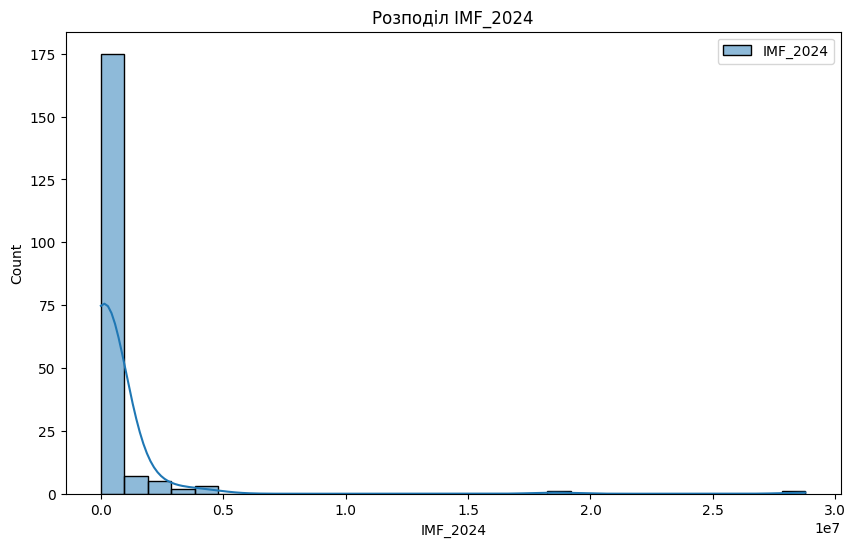

In [1]:
#15.Побудуйте гістограму для розподілу показників MVF_2024 серед всіх
#країн. Який вигляд має розподіл? Чи є країни, що виділяються?
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.str.replace(r'\[n \d+\]', '', regex=True)) #прибрано артефакти у вигляді [n *]

df[('IMF_2024', 'Forecast')] = pd.to_numeric(df[('IMF_2024', 'Forecast')], errors='coerce')
df[('WorldBank_2023', 'Forecast')] = pd.to_numeric(df[('WorldBank_2023', 'Forecast')], errors='coerce')
df["UN_2022", "Forecast"] = pd.to_numeric(df["UN_2022", "Forecast"], errors='coerce')

print("\n", df.head())
df_no_world = df[df[('Country', 'Country')] != 'World']
IMF = [('Country', 'Country'), ('IMF_2024', 'Forecast')]
WB = [('Country', 'Country'), ('WorldBank_2023', 'Forecast')]
UN = [('Country', 'Country'), ("UN_2022", "Forecast")]

plt.figure(figsize=(10, 6))
sns.histplot(df_no_world[IMF].dropna(), bins=30, kde=True)
plt.title("Розподіл IMF_2024")
plt.xlabel("IMF_2024")
plt.show()

In [8]:
#16.Розрахуйте частку кожної країни в загальному значенні для кожного
#року (MVF_2024, WorldBank_2023, OON_2022). Як змінюються частки
#країн з часом (дати відповідь)?
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.str.replace(r'\[n \d+\]', '', regex=True)) #прибрано артефакти у вигляді [n *]

IMFNUM = df[('IMF_2024', 'Forecast')] = pd.to_numeric(df[('IMF_2024', 'Forecast')], errors='coerce')
WBNUM = df[('WorldBank_2023', 'Forecast')] = pd.to_numeric(df[('WorldBank_2023', 'Forecast')], errors='coerce')
UNNUM = df["UN_2022", "Forecast"] = pd.to_numeric(df["UN_2022", "Forecast"], errors='coerce')

print("\n", df.head())
df_no_world = df[df[('Country', 'Country')] != 'World']
df = df_no_world

df["Share_IMF"] = IMFNUM / IMFNUM.sum() * 100
df["Share_WB"] = WBNUM / WBNUM.sum() * 100
df["Share_UN"] = UNNUM / UNNUM.sum() * 100

print("\nTop 5 countries by share of total IMF_2024:")
print(df.nlargest(5, "Share_IMF")[["Country", "Share_IMF"]])


          Country     IMF_2024       WorldBank_2023            UN_2022      
         Country     Forecast  Year       Forecast  Year     Forecast  Year
0          World  109529216.0  2024    105435540.0  2023  100834796.0  2022
1  United States   28781083.0  2024     27360935.0  2023   25744100.0  2022
2          China   18532633.0  2024     17794782.0  2023   17963170.0  2022
3        Germany    4591100.0  2024      4456081.0  2023    4076923.0  2022
4          Japan    4110452.0  2024      4212945.0  2023    4232173.0  2022

Top 5 countries by share of total IMF_2024:
         Country  Share_IMF
         Country           
1  United States  13.140283
2          China   8.461254
3        Germany   2.096111
4          Japan   1.876667
5          India   1.797481


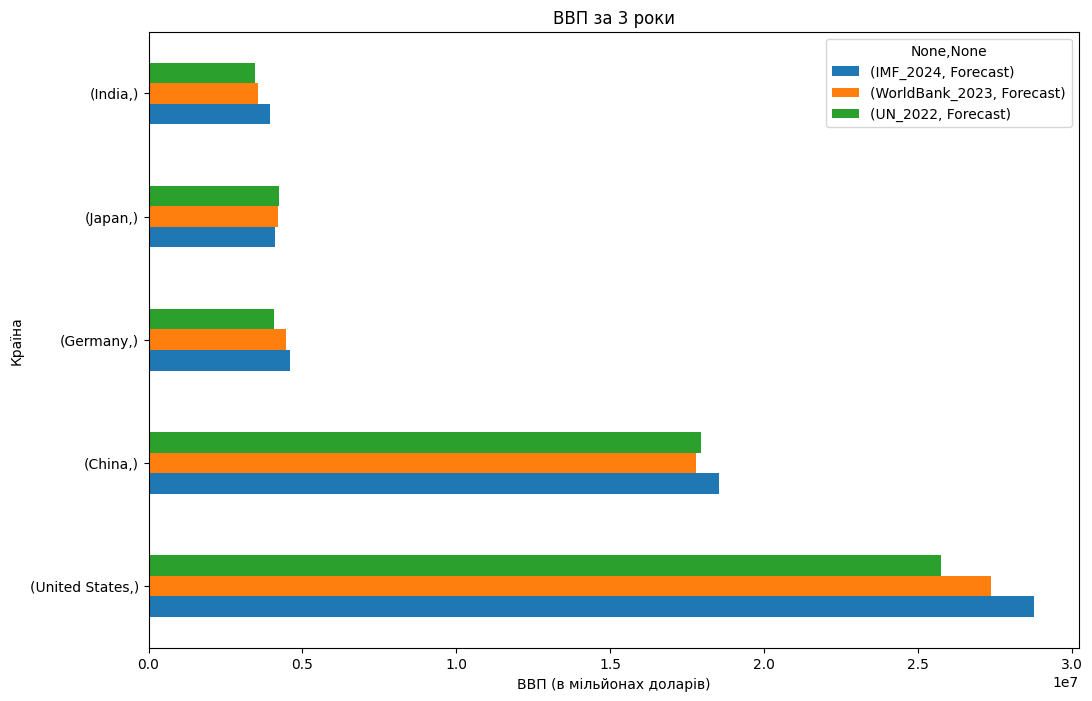

In [18]:
#17.Візуалізуйте зміни в показниках для кожної країни за три роки на
#графіку. Які країни показують стабільне зростання або спад (дати
#відповідь)?
import pandas as pd
import numpy as np
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
tables = pd.read_html(url)
df = tables[2]
arrays = [['Country', 'IMF_2024', 'IMF_2024', 'WorldBank_2023', 'WorldBank_2023', "UN_2022", "UN_2022"],
           ['Country', 'Forecast', 'Year', 'Forecast', 'Year', 'Forecast', 'Year']]

df.columns = pd.MultiIndex.from_arrays(arrays)
df.replace("—", np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df = df.apply(lambda x: x.str.replace(r'\[n \d+\]', '', regex=True)) #прибрано артефакти у вигляді [n *]

IMFNUM = df[('IMF_2024', 'Forecast')] = pd.to_numeric(df[('IMF_2024', 'Forecast')], errors='coerce')
WBNUM = df[('WorldBank_2023', 'Forecast')] = pd.to_numeric(df[('WorldBank_2023', 'Forecast')], errors='coerce')
UNNUM = df["UN_2022", "Forecast"] = pd.to_numeric(df["UN_2022", "Forecast"], errors='coerce')

df_no_world = df[df[('Country', 'Country')] != 'World']
df = df_no_world

df["Share_IMF"] = IMFNUM / IMFNUM.sum() * 100
df["Share_WB"] = WBNUM / WBNUM.sum() * 100
df["Share_UN"] = UNNUM / UNNUM.sum() * 100
largest = df.nlargest(5, "Share_IMF")
largest.set_index("Country")[["IMF_2024", "WorldBank_2023", "UN_2022"]].plot(kind="barh", figsize=(12, 8))
plt.title("ВВП за 3 роки")
plt.xlabel("ВВП (в мільйонах доларів)")
plt.ylabel("Країна")
plt.show()
